# Описание проекта

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.


Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Описание данных**


**Данные для первой части:**

Файл `/datasets/hypothesis.csv`:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.



**Данные для второй части**


Файл `/datasets/orders.csv`:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.



Файл `/datasets/visitors.csv`:

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


## 1. Приоритизация гипотез

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
pd.set_option('display.max_colwidth', 0)

In [2]:
#сохраним файл с гипотезами
try:
    hypothesis = pd.read_csv('/Users/denis_sl/Desktop/проект A:B /hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### 1.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

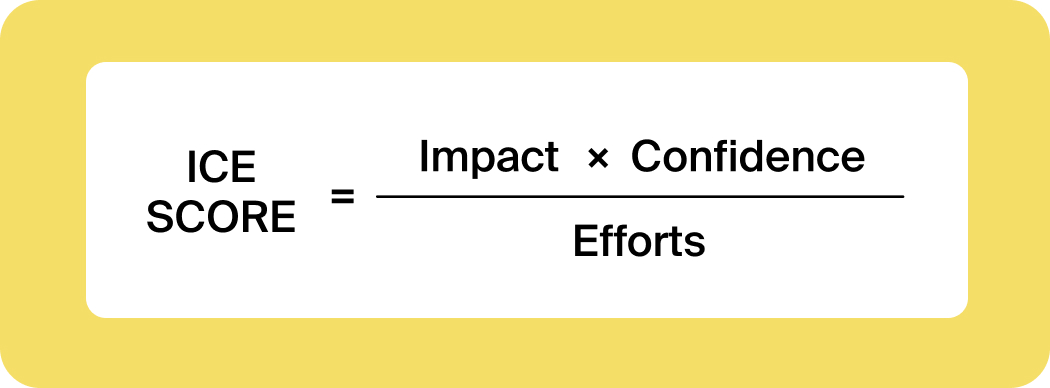

In [4]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 1)
hypothesis = hypothesis.sort_values('ICE', ascending=False).reset_index(drop=True)

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


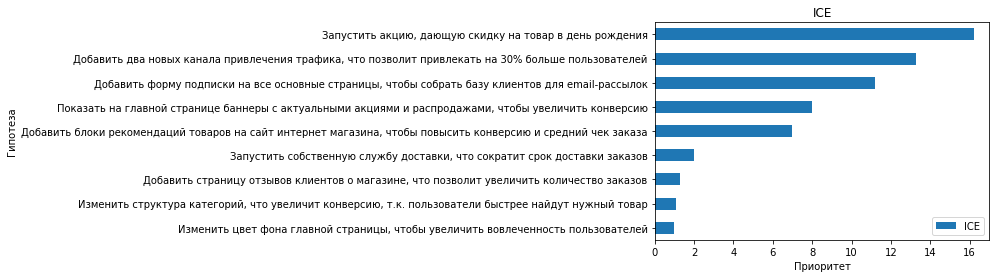

In [6]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

### 1.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

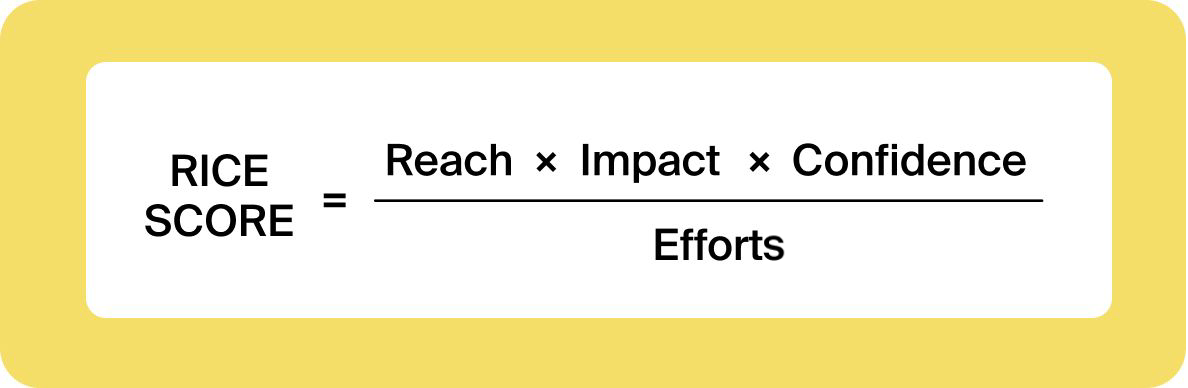

In [7]:
hypothesis['RICE'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 1)
hypothesis = hypothesis.sort_values('RICE', ascending=False).reset_index(drop=True)

In [8]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


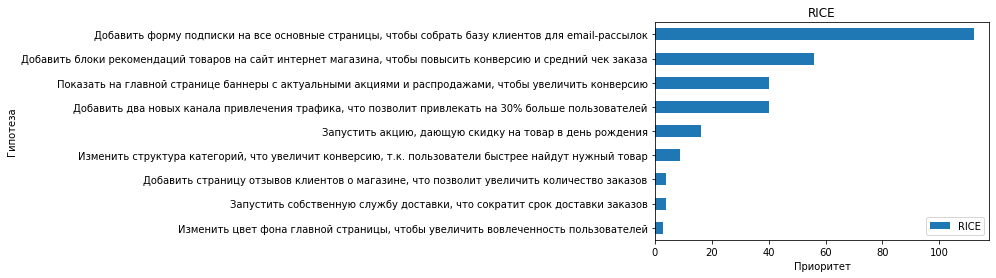

In [9]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

**Вывод:**

Мы применили два варианта приоритизации гипотез. У нас получились немного разные результаты, так как RICE учитывает охват, в то время как ICE - нет

## 2. Анализ A/B теста

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.


2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.


3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.


5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.


6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.


7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.


11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.


13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Предобратока данных**

In [10]:
#сохраняем датасеты
try:
    orders = pd.read_csv('/Users/denis_sl/Desktop/проект A:B /orders.csv', parse_dates=['date'])
    visitors = pd.read_csv('/Users/denis_sl/Desktop/проект A:B /visitors.csv', parse_dates=['date'])
except:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
#исправим название столбцов
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
#приведм стобцы с датой к нужному формату
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [15]:
#посмторим на количество заказов и участников теста по группам 
visitors_A = visitors[visitors['group']=='A']['visitors'].sum()
visitors_B = visitors[visitors['group']=='B']['visitors'].sum()

print('Кол-во посетителей в группе А: {}'.format(visitors_A))
print('Кол-во посетителей в группе B: {}'.format(visitors_B))
print()


purchases_A = orders[orders['group']=='A']['transaction_id'].count()
purchases_B= orders[orders['group']=='B']['transaction_id'].count()

print('Кол-во покупок в группе A: {}'.format(purchases_A))
print('Кол-во покупок в группе B: {}'.format(purchases_B))

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916

Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


In [16]:
user_by_group = orders.groupby('visitor_id', as_index=False).agg({'group': 'nunique'}).sort_values(by='group', ascending=False)
print('Кол-во пользователей, которые есть в обоих группах: ', user_by_group.query('group == 2')['visitor_id'].count())

Кол-во пользователей, которые есть в обоих группах:  58


Мы посчитали количество посетителей и покупок в каждой из двух групп. Также мы обнаружили, что 58 пользователй у нас попали в обе группы. Я считаю, что их можно не удалять, так как отношение этих пользователей к общим в каждой группе очень мало

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [19]:
#посчитаем сразу средний чек и привдем столбец с датой к нужному формату
cumulativeData['average_check'] = round(cumulativeData['revenue'] / cumulativeData['orders'], 2)

In [20]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,average_check
0,2019-08-01,A,24,20,148579,719,6190.79
1,2019-08-01,B,21,20,101217,713,4819.86
2,2019-08-02,A,44,38,242401,1338,5509.11
3,2019-08-02,B,45,43,266748,1294,5927.73
4,2019-08-03,A,68,62,354874,1845,5218.74


In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'average_check']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'average_check']]

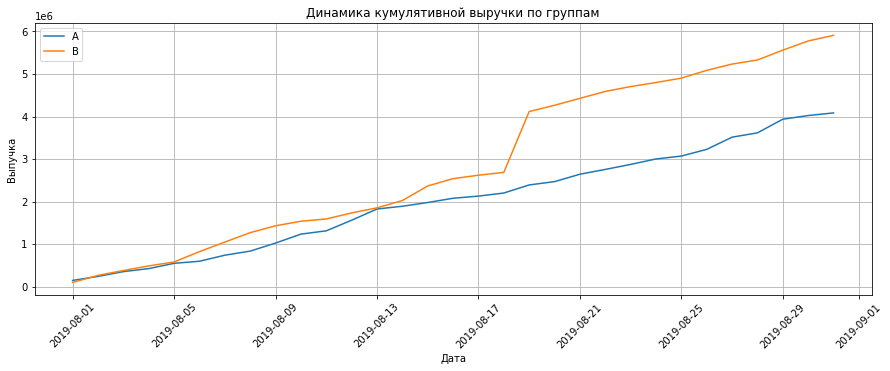

In [22]:
plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Динамика кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выпучка')
plt.xticks(rotation=45)
plt.grid()
plt.legend();

**Вывод:**

Выручка группы А растёт линейно и плавно вверх. У группы В есть один резкий скачок, который скорее всего является выбросом. Скорее всего такой резкий скачок группы В произошел, потому что кто-то совершил аномально дорогой заказ.

### 2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

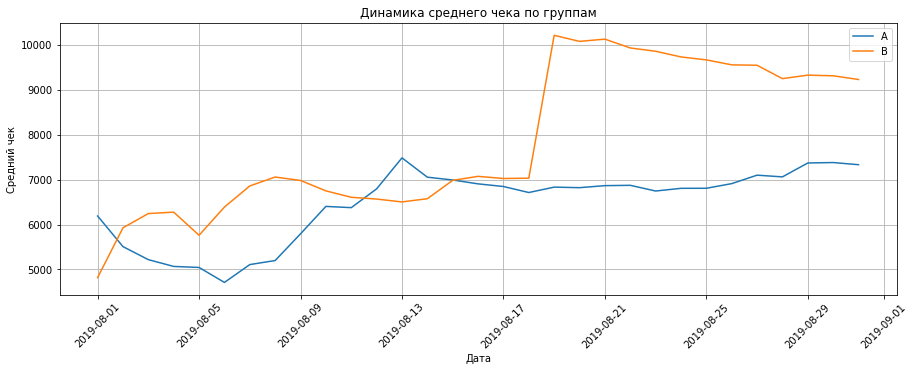

In [23]:
plt.figure(figsize=(15, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['average_check'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['average_check'], label='B')

plt.title('Динамика среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.grid()
plt.legend();

**Вывод:**

Здесь примерно такая же картина, виден резкий скачок среднего чека у группы В между 17 и 21 августа

### 2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

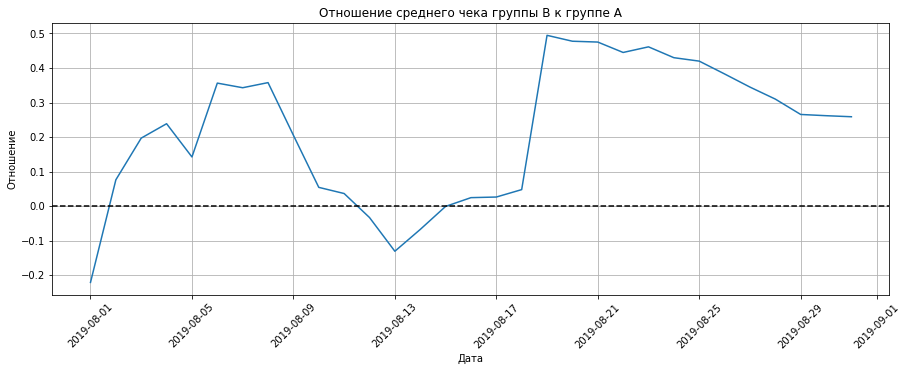

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])


plt.figure(figsize=(15, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['average_check_B'] / mergedCumulativeRevenue['average_check_A'] -1)


plt.title('Отношение среднего чека группы В к группе А')
plt.xlabel("Дата")
plt.ylabel('Отношение')
plt.xticks(rotation=45)
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:**

Все три графика примерно одинаковые, сначала мы видим рост среднего чека, затем небольшой спад. Но в августе также наблюдается пик графика, скорее всего был совершён аномально дорогой заказ

### 2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

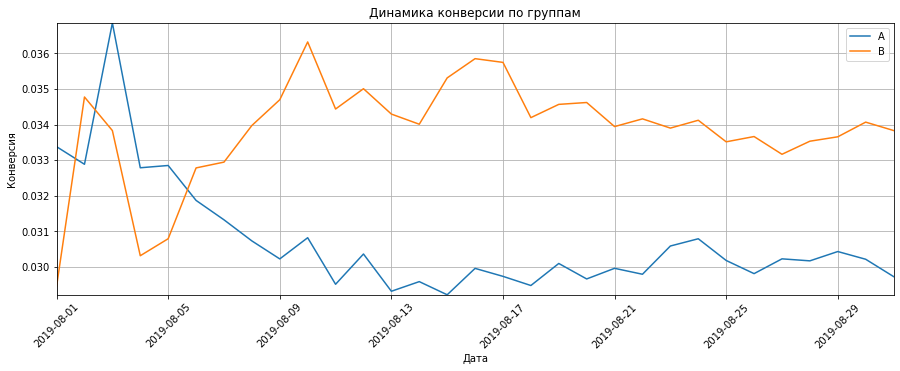

In [25]:
plt.figure(figsize=(15, 5))

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


plt.title('Динамика конверсии по группам')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# задаем масштаб осей
plt.axis([min(cumulativeData['date']), 
          max(cumulativeData['date']), 
          min(cumulativeData['conversion']), 
          max(cumulativeData['conversion'])]);

**Вывод:**

У обоих групп заметен резкий рост конверсии в самом начале августе, но затем у конверсии в группе А происходит сильный спад. Конверсия у группы В кажется намного лучше

### 2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

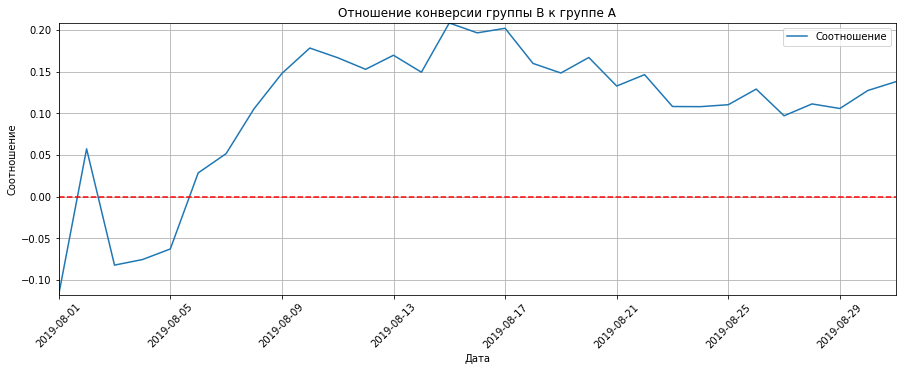

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

plt.figure(figsize=(15, 5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversion_B']/mergedCumulativeConversions['conversion_A']-1, label='Соотношение')
plt.title('Отношение конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Соотношение')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.axis([min(mergedCumulativeConversions['date']),
          max(mergedCumulativeConversions['date']),
          min(mergedCumulativeConversions['conversion_B']/mergedCumulativeConversions['conversion_A']-1),
          max(mergedCumulativeConversions['conversion_B']/mergedCumulativeConversions['conversion_A']-1)]);



**Вывод:**

Конверсия группы А выигрывает только в период с 3 по  6 августа. В остальное время конверсия группы В выглядит намного лучше. График закрепился в значениях от 10% до 15%

### 2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [27]:
#составим сводную таблицу
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']

In [28]:
orders_by_users.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


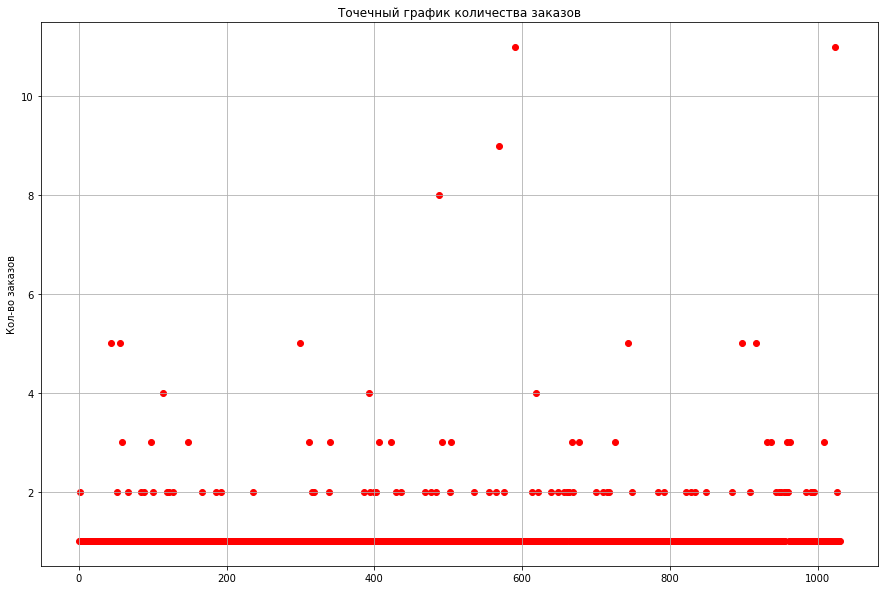

In [29]:
#значение по оси Х
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders_by_users['orders'], color='red')
plt.title('Точечный график количества заказов')
plt.ylabel('Кол-во заказов')
plt.grid()
plt.show()

**Вывод:**

На графике сразу видны несколько точечных выбросов - больше 4 заказов. Чаще всего пользователи совершали 1 или 2 заказа

### 2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [30]:
#считаем перцентили

print('90 перцентиль: %.2f' % (np.percentile(orders_by_users['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_by_users['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_by_users['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


**Вывод:**

Исхлдя из графика и перцентилей, будем считать пользователей аномальными, если они сделали `больше 4 заказов`

### 2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

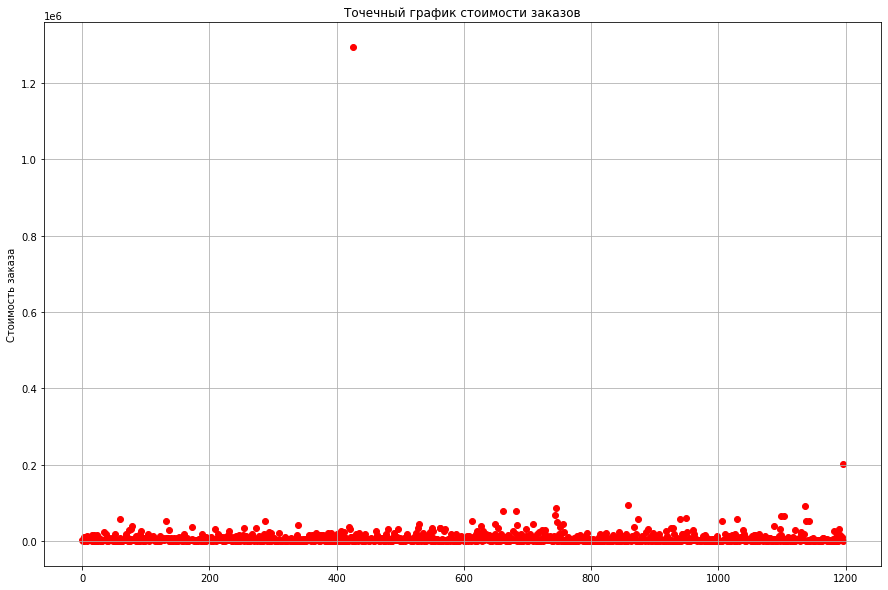

In [31]:
#значение по оси Х
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders['revenue'], color='red')
plt.title('Точечный график стоимости заказов')
plt.ylabel('Стоимость заказа')
plt.grid()
plt.show()

In [32]:
#узнаем что это за два выброса
orders.sort_values('revenue', ascending=False).head(3)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A


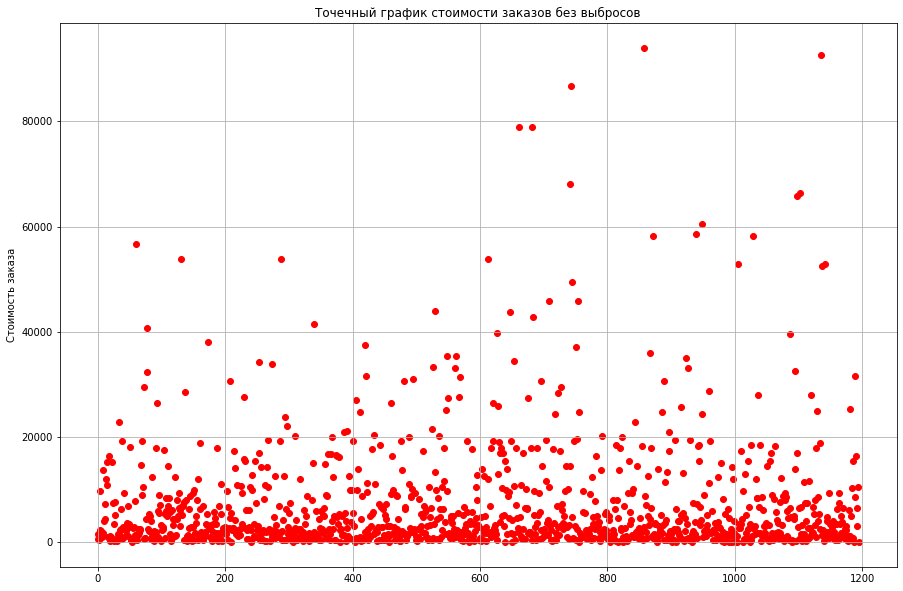

In [33]:
#уберем эти два аномально больших заказа и построим еще раз график
orders_clear = orders.query('revenue != [1294500, 202740]')

x_values = pd.Series(range(0,len(orders_clear)))

plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders_clear['revenue'], color='red')
plt.title('Точечный график стоимости заказов без выбросов')
plt.ylabel('Стоимость заказа')
plt.grid()
plt.show()

**Вывод:**

Мы четко видим два выброса по сумме заказа, возможно из-за этого и был резкий скачок у группы В на графиках выше. На графике без этих двух выбросов видно, что большинство заказов не превышают 20000.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [34]:
#считаем перцентили

print('90 перцентиль: %.1f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.1f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.1f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.0
95 перцентиль: 28000.0
99 перцентиль: 58233.2


In [35]:
#проверим сумму самого дорого заказа и дату совершения
max(orders['revenue'])

1294500

In [36]:
orders.query('revenue == 1294500')

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


**Вывод:**
Ожидания потвердились: самый дорогой заказ был совершен 19 августа, что соответсвует графику. Значит, это анаомалия. Также будем считать аномалией заказы дороже `58 233`

### 2.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** Конверсия в группе A равна конверсии в группе B


**Альтернативная гипотеза:** Конверсия в группе A отличается от  конверсии в группе B


**Уровень значимости:** 5%


Используем статистический критерий Манна Уитни

In [37]:
#посчитаем кол-во заказов по пользователям для двух групп
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']


ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [38]:
# в массиве у тех, кто не делал ни одного заказа будет стоять 0
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)

In [39]:
#воспользуемся критерием Манна-Уитни
alpha = 0.05
p_value = (st.mannwhitneyu(sampleA, sampleB)[1])

print("Относительный прирост в конверсии В по отношению к группе А до очистки данных: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print('P-value: {0:.3f}'.format(p_value))
print()

if p_value < alpha:
    print('Есть основания отвергнуть нулевую гипотезу: статистически значимые различия в конверсиях ЕСТЬ')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: статистически значимых различий в конверсиях НЕТ')

Относительный прирост в конверсии В по отношению к группе А до очистки данных: 0.138
P-value: 0.017

Есть основания отвергнуть нулевую гипотезу: статистически значимые различия в конверсиях ЕСТЬ


**Вывод:**

В качестве конверсии мы взяли кол-во заказов для каждого пользователя. Воспользовавшись критерием Манна-Уитни, мы увидеди чт о p-value значительно больше уровня значимости, поэтому у нас нет оснований отвергать нулевую гипотезу. Конверсия грууппы В по лучше А по сырым данным на 15%

### 2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


**Нулевая гипотеза:** Средний чек A равен среднему чеку группы B


**Альтернативная гипотеза:** Средний чек A отличается от среднего чека группы B

In [40]:
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('Относительный прирост в среднем чеке В по отношению к группе А до очистки данных:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


print('P-value: {0:.3f}'.format(p_value))
print()

if p_value < alpha:
    print('Есть основания отвергнуть нулевую гипотезу: статистически значимые различия в средних чеках ЕСТЬ')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: статистически значимых различий в средних чеках НЕТ')

Относительный прирост в среднем чеке В по отношению к группе А до очистки данных:0.259
P-value: 0.729

Нет оснований отвергнуть нулевую гипотезу: статистически значимых различий в средних чеках НЕТ


**Вывод:**

На основании критерия Маннна-Уитни у нас нет оснований отвергать гипотезу, что средний чек А превосходит средний чек В. Средний чек группы В лучше А на 26%

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** Конверсия в группе A равна конверсии в группе B


**Альтернативная гипотеза:** Конверсия в группе A отличается от  конверсии в группе B

Мы уже решили, что аномальными пользователи считаются те, кто совершил больше 4 заказов или сделал заказ на сумму более 58 233

In [41]:
#значения, которые мы приняли за аномальные
limit_orders = 4
limit_revenue = 58223

In [42]:
#аномальные заказы
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > limit_orders]['userId'],
    ordersByUsersB[ordersByUsersB['orders'] > limit_revenue]['userId'],],axis=0,)

#аномальные суммы заказов
usersWithExpensiveOrders = orders[orders['revenue'] >= 58223]['visitor_id']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

print('Количество аномальных пользователей:', abnormalUsers.shape[0]) 

Количество аномальных пользователей: 14


In [43]:
#составим списки кол-ва заказов sampleA и sampleB со всеми пользователями по группам 
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

In [44]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)

sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)

In [45]:
print('Относительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {0:.5f}'.format(results.pvalue))
print()


if results.pvalue < alpha:
    print('Есть основания отвергнуть нулевую гипотезу: статистически значимые различия в конверсиях ЕСТЬ')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: статистически значимых различий в конверсиях НЕТ')

Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.154
P-value: 0.01449

Есть основания отвергнуть нулевую гипотезу: статистически значимые различия в конверсиях ЕСТЬ


**Вывод:**

По очищенным данным конверсия В выше конверсии из группы А на 16%. Использовав критерий Уитни, мы можем предположить , что в конверсиях есть статистически значимые различия

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** Средний чек A равен среднему чеку группы B

**Альтернативная гипотеза:** Средний чек A отличается от среднего чека группы B

In [46]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])


print('P-value: {0:.3f}'.format(results.pvalue))
print()


if results.pvalue < alpha:
    print('Есть основания отвергнуть нулевую гипотезу: статистически значимые различия в средних чеках ЕСТЬ')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: статистически значимых различий в средних чеках НЕТ')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.005
P-value: 0.742

Нет оснований отвергнуть нулевую гипотезу: статистически значимых различий в средних чеках НЕТ


**Вывод:**

Мы видим, что средний чек группы В проигрывает чеку из группы А. Также на основе  p-value у нас нет оснований отвергать нулевую гипотезу.

###  Примите решение по результатам теста и объясните его. 

**Варинаты решений:**


1. Остановить тест, зафиксировать победу одной из групп. 

2. Остановить тест, зафиксировать отсутствие различий между группами. 

3. Продолжить тест.

## Общий вывод

1. Мы использовали фреймворки ICE и RICE для приоритизации гипотез, выявили самые приоритетные гипотезы,


2. Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. Но у группы В были некоторые выбрсы, которые мы исключили после выделения аномальных пользователей. 


3. До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - в группе В конверсия выше на 17% после очистки данных и на 15% по "сырым" данным. 


4. Используя разницу конверсии конверсии между группами до и после очистки данных, мы можем сказать, что **разница между конверсиями двух групп является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B**